# Installation

In [ ]:
# ==========================
# Installation (if needed)
# ==========================
# Install the 'ordpy' package for ordinal pattern analysis and entropy measures
!pip install ordpy


# Libraries Import Section

In [ ]:

# Main library for creating plots and visualizations in Python
import matplotlib.pyplot as plt

# Library for data manipulation and analysis using DataFrames
import pandas as pd

# Fundamental library for numerical computations and array/matrix operations
import numpy as np

# Statistical modeling library providing tools for time series analysis and regression
import statsmodels.api as sm

# Module from SciPy used for statistical tests, distributions, and advanced mathematical functions
from scipy import stats

# Library for ordinal analysis, often used in studies of complexity, entropy, and time series dynamics
import ordpy
from scipy.spatial.distance import euclidean


# Loading the Dataset

In [ ]:
# ==========================
# 📊 Loading the Dataset
# ==========================

nome_aba = 'Reconstruction'
url = 'https://raw.githubusercontent.com/nascimento-fisica/FINAL_RECONSTRUCTED_Brazil_1950_2015/main/FINAL_RECONSTRUCTED_Brazil_1950_2015.xlsx'
df_base = pd.read_excel(url, sheet_name=nome_aba)

display(df_base)


,Nro,CountryFishing,EEZarea,SubAreaEEZ,FAOarea,OtherArea,Year,PortugueseCommonName,TaxonName,CatchAmount_t,Sector,CatchType,Input,Notes,Reference,Unnamed: 15,Unnamed: 16
0,1,76,76,NaN,41,Amapá,1950,Canguira,Amphiarius phrygiatus,0.283311,"Artisanal (SS, C)",Landing (estimated),Reconstructed,NaN,NaN,NaN,NaN
1,2,76,76,NaN,41,Amapá,1950,Cangatá,Aspistor quadriscutis,2.885233,"Artisanal (SS, C)",Landing (estimated),Reconstructed,NaN,NaN,NaN,NaN
2,3,76,76,NaN,41,Amapá,1950,Bandeirado,Bagre bagre,2.340716,"Artisanal (SS, C)",Landing (estimated),Reconstructed,NaN,NaN,NaN,NaN
3,4,76,76,NaN,41,Amapá,1950,Xaréu,Caranx spp,0.984036,"Artisanal (SS, C)",Landing (estimated),Reconstructed,NaN,NaN,NaN,NaN
4,5,76,76,NaN,41,Amapá,1950,Cação,Carcharhinidae,2.642640,"Artisanal (SS, C)",Landing (estimated),Reconstructed,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125609,125610,76,76,NaN,41,Rio Grande do Sul,2011,Outros peixes,Osteichthyes,2.355000,"Artisanal (SS, C)",Landing (reported),Reconstructed,NaN,IBAMA/CEPERG (2012),NaN,NaN
125610,125611,76,76,NaN,41,Rio Grande do Sul,2011,Peixe prego,Gempylidae,9.044000,"Industrial (LS, C)",Landing (reported),Reconstructed,NaN,IBAMA/CEPERG (2012),NaN,NaN
125611,125612,76,76,NaN,41,Rio Grande do Sul,2011,Papa figo,Osteichthyes,1.147000,"Industrial (LS, C)",Landing (reported),Reconstructed,NaN,IBAMA/CEPERG (2012),NaN,NaN
125612,125613,76,76,NaN,41,Rio Grande do Sul,2011,Parona,Parona signata,0.120000,"Industrial (LS, C)",Landing (reported),Reconstructed,NaN,IBAMA/CEPERG (2012),NaN,NaN


# Functions

In [ ]:
#@title Functions

def persistencia_ordinal(dados):
    """
    Calculates the normalized ordinal persistence of a time series.
    Args: dados: A NumPy array containing the time series values.
    Returns: ordinal persistence value.

    More details: ordinal persistence is a measure that quantifies the
    probability of continuation of trends in a time series,
    i.e., of continuing to increase or decrease.

    If P > 0: Persistent time series (tendency to continue in the current direction).
    If P = 0: Random time series (no defined trend).
    If P < 0: Anti-persistent time series (tendency to reverse the current direction).
    """

    # Calculate ordinal persistence using the ordpy library
    P = ordpy.permutation_contrasts(dados)[1]  # this function always uses dx=3

    Prand = 2/6  # Occurs for a completely random series
    persistencia = P - Prand

    return persistencia


def entropia_de_permutacao(dados):
    """ Calculates the permutation entropy of a time series using the ordinal method """
    E = ordpy.complexity_entropy(dados, dx=3)[0]
    return E


def complexidade_de_permutacao(dados):
    """ Calculates the permutation complexity of a time series using the ordinal method """
    C = ordpy.complexity_entropy(dados, dx=3)[1]
    return C


# Filtering

In [ ]:
# ==========================
# Grouping Data by State and Sector
# ==========================

# List of Brazilian states to be analyzed
estados = [
    'Amapá', 'Pará', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
    'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
    'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
    'Santa Catarina', 'Rio Grande do Sul'
]

# Dictionaries to store grouped DataFrames for artisanal and industrial sectors
df_artesanal_agrupado = {}
df_industrial_agrupado = {}

# Extract all unique years from the original dataset
anos_referencia = pd.DataFrame({'Year': df_base['Year'].unique()})

# Loop through each state
for estado_selecionado in estados:
    # Filter artisanal fishing data for the selected state
    dados_filt_art = df_base[
        (df_base['OtherArea'] == estado_selecionado) &
        (df_base['Sector'] == 'Artisanal (SS, C)')
    ]

    # Group by 'Year' and sum the values in 'CatchAmount_t'
    dados_agrup_art = dados_filt_art.groupby('Year')['CatchAmount_t'].sum().reset_index()
    dados_agrup_art.rename(columns={'CatchAmount_t': 'Artisanal'}, inplace=True)

    # Merge with the reference years to include years without data
    dados_agrup_art = pd.merge(anos_referencia, dados_agrup_art, on='Year', how='outer')

    # Store the grouped artisanal data in the dictionary
    df_artesanal_agrupado[estado_selecionado] = dados_agrup_art

    # Filter industrial fishing data for the selected state
    dados_filt_ind = df_base[
        (df_base['OtherArea'] == estado_selecionado) &
        (df_base['Sector'] == 'Industrial (LS, C)')
    ]

    # Group by 'Year' and sum the values in 'CatchAmount_t'
    dados_agrup_ind = dados_filt_ind.groupby('Year')['CatchAmount_t'].sum().reset_index()
    dados_agrup_ind.rename(columns={'CatchAmount_t': 'Industrial'}, inplace=True)

    # Merge with the reference years to include years without data
    dados_agrup_ind = pd.merge(anos_referencia, dados_agrup_ind, on='Year', how='outer')

    # Store the grouped industrial data in the dictionary
    df_industrial_agrupado[estado_selecionado] = dados_agrup_ind

# Display grouped results for each state (first two rows)
for estado in estados:
    print(f"Artisanal Fishing Production by Year - {estado}:")
    display(df_artesanal_agrupado[estado].head(2))

    print(f"Industrial Fishing Production by Year - {estado}:")
    display(df_industrial_agrupado[estado].head(2))

Artisanal Fishing Production by Year - Amapá:


,Year,Artisanal
0,1950,133.031334
1,1951,179.358540


Industrial Fishing Production by Year - Amapá:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Pará:


,Year,Artisanal
0,1950,4108.703484
1,1951,3626.421592


Industrial Fishing Production by Year - Pará:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Maranhão:


,Year,Artisanal
0,1950,28135.525316
1,1951,24684.748476


Industrial Fishing Production by Year - Maranhão:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Piauí:


,Year,Artisanal
0,1950,356.309144
1,1951,329.407014


Industrial Fishing Production by Year - Piauí:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Ceará:


,Year,Artisanal
0,1950,906.083853
1,1951,1141.752655


Industrial Fishing Production by Year - Ceará:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Rio Grande do Norte:


,Year,Artisanal
0,1950,1312.091588
1,1951,1204.564579


Industrial Fishing Production by Year - Rio Grande do Norte:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Paraíba:


,Year,Artisanal
0,1950,106.479607
1,1951,106.890329


Industrial Fishing Production by Year - Paraíba:


,Year,Industrial
0,1950,689.177408
1,1951,691.835759


Artisanal Fishing Production by Year - Pernambuco:


,Year,Artisanal
0,1950,470.886039
1,1951,374.664376


Industrial Fishing Production by Year - Pernambuco:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Alagoas:


,Year,Artisanal
0,1950,986.470786
1,1951,814.065980


Industrial Fishing Production by Year - Alagoas:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Sergipe:


,Year,Artisanal
0,1950,460.129072
1,1951,628.087421


Industrial Fishing Production by Year - Sergipe:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Bahia:


,Year,Artisanal
0,1950,2551.568080
1,1951,2356.387917


Industrial Fishing Production by Year - Bahia:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Espírito Santo:


,Year,Artisanal
0,1950,1064.833081
1,1951,1392.968956


Industrial Fishing Production by Year - Espírito Santo:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Rio de Janeiro:


,Year,Artisanal
0,1950,8782.144260
1,1951,11888.934271


Industrial Fishing Production by Year - Rio de Janeiro:


,Year,Industrial
0,1950,14433.352847
1,1951,10814.111656


Artisanal Fishing Production by Year - São Paulo:


,Year,Artisanal
0,1950,1468.268095
1,1951,1463.327843


Industrial Fishing Production by Year - São Paulo:


,Year,Industrial
0,1950,9604.875535
1,1951,9867.596988


Artisanal Fishing Production by Year - Paraná:


,Year,Artisanal
0,1950,972.386416
1,1951,1690.815930


Industrial Fishing Production by Year - Paraná:


,Year,Industrial
0,1950,NaN
1,1951,NaN


Artisanal Fishing Production by Year - Santa Catarina:


,Year,Artisanal
0,1950,4990.654470
1,1951,5448.230387


Industrial Fishing Production by Year - Santa Catarina:


,Year,Industrial
0,1950,87.466723
1,1951,95.486246


Artisanal Fishing Production by Year - Rio Grande do Sul:


,Year,Artisanal
0,1950,13055.600954
1,1951,15307.624096


Industrial Fishing Production by Year - Rio Grande do Sul:


,Year,Industrial
0,1950,24184.415058
1,1951,23383.190245


In [ ]:
# Loop through the states
resultados = []  # List to store the results
for estado in estados:
    # Count NaN
    num_nan_artesanal = df_artesanal_agrupado[estado]['Artisanal'].isna().sum()
    num_nan_industrial = df_industrial_agrupado[estado]['Industrial'].isna().sum()
    num_nan_total = num_nan_artesanal + num_nan_industrial  # Calculate the total NaN

    # Total data points
    total_data_points = df_artesanal_agrupado[estado]['Artisanal'].notna().sum() + df_industrial_agrupado[estado]['Industrial'].notna().sum()

    # Handle the case when total_data_points is 0 to avoid division by zero.
    if total_data_points == 0:
        percentage_nan = 0  # Or handle it differently, e.g., set to NaN
    else:
        percentage_nan = 100 * num_nan_total / total_data_points

    # Add the results to the list
    resultados.append({
        'Estado': estado,
        'NumNanArt': num_nan_artesanal,
        'NumNanInd': num_nan_industrial,
        'NumNanTot': num_nan_total,
        'NumValInd': df_industrial_agrupado[estado]['Industrial'].notna().sum(),
        'NumValArt': df_artesanal_agrupado[estado]['Artisanal'].notna().sum(),
        'PercNan': np.round(percentage_nan, 2)
    })

# Create a DataFrame from the results list
df_nan = pd.DataFrame(resultados)
display(df_nan)


,Estado,NumNanArt,NumNanInd,NumNanTot,NumValInd,NumValArt,PercNan
0,Amapá,0,16,16,50,66,13.79
1,Pará,0,10,10,56,66,8.20
2,Maranhão,0,26,26,40,66,24.53
3,Piauí,0,50,50,16,66,60.98
4,Ceará,0,11,11,55,66,9.09
5,Rio Grande do Norte,0,10,10,56,66,8.20
6,Paraíba,0,8,8,58,66,6.45
7,Pernambuco,0,14,14,52,66,11.86
8,Alagoas,0,49,49,17,66,59.04
9,Sergipe,0,47,47,19,66,55.29


In [ ]:
# Dictionary of state abbreviations
siglas = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Pará': 'PA',
    'Paraíba': 'PB',
    'Paraná': 'PR',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'São Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO',
    'Distrito Federal': 'DF'
}
# Create the 'Sigla' column using the map function
df_nan['Sigla'] = df_nan['Estado'].map(siglas)
#display(df_nan)
# Create a list of columns in the desired order
new_column_order = ['Sigla', 'Estado', 'NumNanArt', 'NumNanInd', 'NumNanTot', 'NumValInd', 'NumValArt', 'PercNan']

# Reorder the DataFrame columns
df_nan = df_nan[new_column_order]
display(df_nan)


,Sigla,Estado,NumNanArt,NumNanInd,NumNanTot,NumValInd,NumValArt,PercNan
0,AP,Amapá,0,16,16,50,66,13.79
1,PA,Pará,0,10,10,56,66,8.20
2,MA,Maranhão,0,26,26,40,66,24.53
3,PI,Piauí,0,50,50,16,66,60.98
4,CE,Ceará,0,11,11,55,66,9.09
5,RN,Rio Grande do Norte,0,10,10,56,66,8.20
6,PB,Paraíba,0,8,8,58,66,6.45
7,PE,Pernambuco,0,14,14,52,66,11.86
8,AL,Alagoas,0,49,49,17,66,59.04
9,SE,Sergipe,0,47,47,19,66,55.29


In [ ]:
# Order the DataFrame by 'PercentageNan'
df_nan_sorted = df_nan.sort_values(by='PercNan')

# Create a new DataFrame with 'PercentageNan' less than 25%
df_nan_filtered = df_nan_sorted[df_nan_sorted['PercNan'] < 25]

# Reset the index and start from 1
df_nan_filtered = df_nan_filtered.reset_index(drop=True)
df_nan_filtered.index = df_nan_filtered.index + 1

# Remove the 'Estado' column from the DataFrame.
df_estados_validos = df_nan_filtered.drop('Estado', axis=1)
display(df_estados_validos)

arr_estados_validos = df_estados_validos['Sigla'].to_numpy()
print(arr_estados_validos)

,Sigla,NumNanArt,NumNanInd,NumNanTot,NumValInd,NumValArt,PercNan
1,SC,0,0,0,66,66,0.00
2,RJ,0,0,0,66,66,0.00
3,SP,0,0,0,66,66,0.00
4,RS,0,0,0,66,66,0.00
5,PB,0,8,8,58,66,6.45
6,RN,0,10,10,56,66,8.20
7,PA,0,10,10,56,66,8.20
8,CE,0,11,11,55,66,9.09
9,PE,0,14,14,52,66,11.86
10,AP,0,16,16,50,66,13.79


['SC' 'RJ' 'SP' 'RS' 'PB' 'RN' 'PA' 'CE' 'PE' 'AP' 'ES' 'MA']


# Fig.1 - Outliers - time series

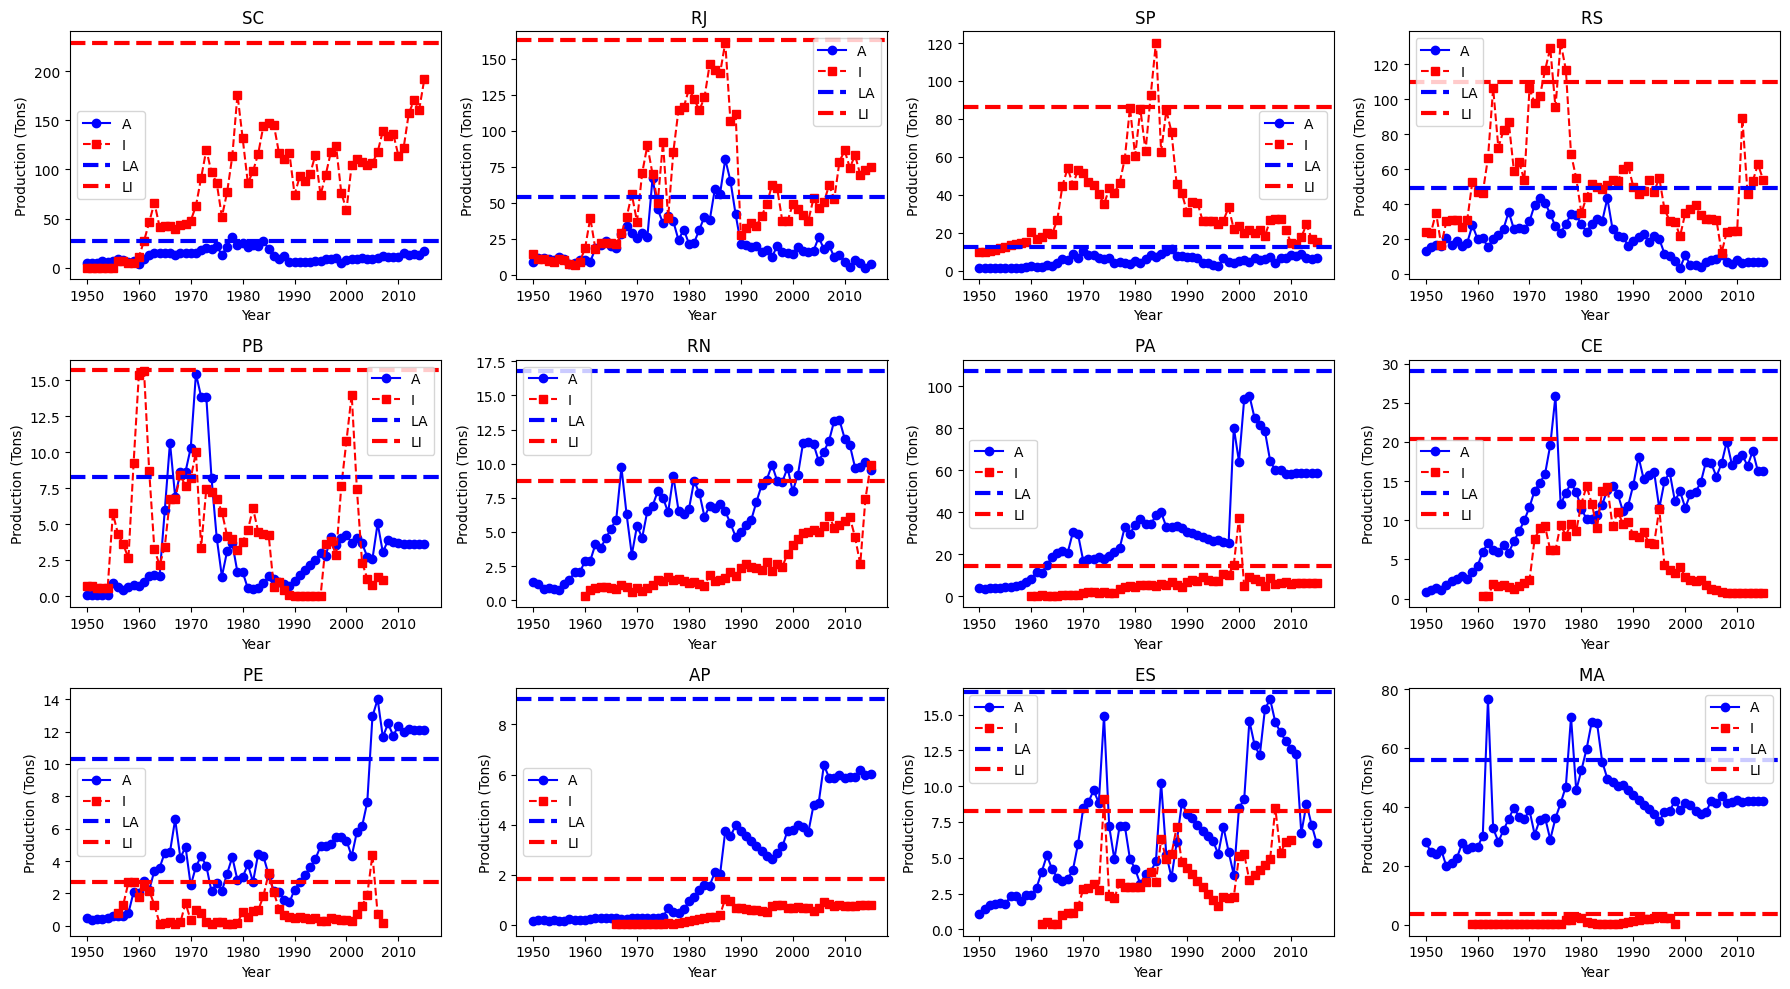

In [ ]:
#@title Fig.1 - Outliers - time series
""" Plot for the dissertation-article """

# Define the subplot grid
plt.style.use('default')
fig, axes = plt.subplots(3, 4, figsize=(18,10))
axes = axes.flatten()

# Iterate over valid states and plot the data
resultados = []  # List to store the results
for i, estado in enumerate(arr_estados_validos[:12]):  # Ensuring we do not exceed 12 states
    ax = axes[i]
    # Get the full state name corresponding to the abbreviation
    full_state_name = df_nan[df_nan['Sigla'] == estado]['Estado'].values[0]

    # Plot time series, dividing by 1000 for tons
    x_art = df_artesanal_agrupado[full_state_name]['Year']
    y_art = df_artesanal_agrupado[full_state_name]['Artisanal'] / 1000

    x_ind = df_industrial_agrupado[full_state_name]['Year']
    y_ind = df_industrial_agrupado[full_state_name]['Industrial'] / 1000

    ax.plot(x_art, y_art, 'o-', label='A', color='blue')
    ax.plot(x_ind, y_ind, 's--', label='I', color='red')

    # Outliers - Artisanal
    Q1 = y_art.quantile(0.25) ; Q3 = y_art.quantile(0.75) ; IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR ; limite_superior = Q3 + 1.5 * IQR
    ax.axhline(y=limite_superior, label='LA', linestyle='--', linewidth=3, color='blue')
    nOutArt = np.sum(y_art > limite_superior)

    # Outliers - Industrial
    Q1 = y_ind.quantile(0.25) ; Q3 = y_ind.quantile(0.75) ; IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR ; limite_superior = Q3 + 1.5 * IQR
    ax.axhline(y=limite_superior, label='LI', linestyle='--', linewidth=3, color='red')
    nOutInd = np.sum(y_ind > limite_superior)

    ax.set_title(r"%s "%(estado ) )
    ax.set_xlabel("Year")
    ax.set_ylabel("Production (Tons)")  # Production (Tons)
    ax.legend()

    # Add results to the dataframe
    nOutTot = nOutArt + nOutInd
    resultados.append({'Sigla': estado, 'nOutInd': nOutInd, 'nOutArt': nOutArt, 'nOutTot': nOutTot})

plt.tight_layout()  # Adjust spacing
df_resultados = pd.DataFrame(resultados)


# Fig.2 - Mean

In [ ]:
medidas = {}  # Dictionary to store the measures by state

# Loop to create plots and calculate measures for each valid state
for i, estado in enumerate(arr_estados_validos[:12]):
    # Get the full state name from the abbreviation
    full_state_name = df_nan[df_nan['Sigla'] == estado]['Estado'].values[0]

    x_art = df_artesanal_agrupado[full_state_name]['Year']
    y_art = df_artesanal_agrupado[full_state_name]['Artisanal']

    x_ind = df_industrial_agrupado[full_state_name]['Year']
    y_ind = df_industrial_agrupado[full_state_name]['Industrial']

    # Find the years where both series have data
    anos_comuns = np.intersect1d(x_art, x_ind)

    # Filter the data to include only the common years
    y_art_filt = y_art[x_art.isin(anos_comuns)]
    y_ind_filt = y_ind[x_ind.isin(anos_comuns)]

    # Remove NaN values from both y_art_filt and y_ind_filt BEFORE calculations
    # This ensures that both arrays have the same valid indices
    common_valid_indices = y_art_filt.notna() & y_ind_filt.notna()
    y_art_filt = y_art_filt[common_valid_indices].to_numpy()  # Convert to NumPy array
    y_ind_filt = y_ind_filt[common_valid_indices].to_numpy()  # Convert to NumPy array

    # Check if there are enough data points after removing NaNs
    if len(y_art_filt) > 1 and len(y_ind_filt) > 1: # and np.std(y_art_filt) != 0 and np.std(y_ind_filt) != 0 :  # Check for zero variance
        # Calculate the difference
        dai = np.sum(y_art_filt - y_ind_filt)/1000  # In tons
        print(i, estado)
        correlation, p_value = stats.pearsonr(y_art_filt, y_ind_filt)

        medidas[estado] = {
          'dai': dai,
          'pearson': correlation,
          #'p_value': p_value,

          'med_art': np.mean(y_art_filt)/1000,  # In tons
          'med_ind': np.mean(y_ind_filt)/1000,  # In tons

          'despad_art': np.std(y_art_filt),
          'despad_ind': np.std(y_ind_filt),

          'entrop_ind': entropia_de_permutacao(y_ind_filt),
          'entrop_art': entropia_de_permutacao(y_art_filt),

          'complex_ind': complexidade_de_permutacao(y_ind_filt),
          'complex_art': complexidade_de_permutacao(y_art_filt),

          'pers_ind': persistencia_ordinal(y_ind_filt),
          'pers_art': persistencia_ordinal(y_art_filt)

        }
# Convert the 'medidas' dictionary to a pandas DataFrame
df_medidas = pd.DataFrame.from_dict(medidas, orient='index')
display(df_medidas)


0 SC
1 RJ
2 SP
3 RS
4 PB
5 RN
6 PA
7 CE
8 PE
9 AP
10 ES
11 MA


,dai,pearson,med_art,med_ind,despad_art,despad_ind,entrop_ind,entrop_art,complex_ind,complex_art,pers_ind,pers_art
SC,-4728.779889,0.420195,12.541199,84.189379,6169.880292,50527.758104,0.919206,0.975616,0.066173,0.022946,0.166667,0.041667
RJ,-2317.451784,0.613376,23.072096,58.185002,15716.824574,40080.200614,0.977680,0.964777,0.020770,0.033613,0.119792,0.041667
SP,-1930.837098,0.490701,5.264357,34.519464,2555.342257,23036.957819,0.963500,0.980521,0.033197,0.019399,0.151042,0.088542
RS,-2275.562770,0.591312,19.492391,53.970615,10397.869706,28186.601245,0.986315,0.981436,0.012997,0.018083,0.104167,0.104167
PB,-62.513817,0.329899,3.295430,4.373255,3632.209250,3860.333441,0.936400,0.945021,0.058049,0.049581,0.220238,0.184524
RN,285.212599,0.759022,7.750111,2.657029,2601.515209,2036.259031,0.959222,0.935992,0.037774,0.055055,0.111111,0.203704
PA,1867.594326,0.469191,38.891128,5.541230,22208.948625,5364.267274,0.985867,0.948758,0.013978,0.047184,0.055556,0.203704
CE,460.489900,-0.032571,13.629009,5.256465,4026.848123,4304.220567,0.967494,0.876981,0.032471,0.102308,0.100629,0.194969
PE,164.796093,0.084217,4.079980,0.910825,2646.937684,914.290305,0.942053,0.880513,0.051971,0.093711,0.206667,0.246667
AP,120.432876,0.905058,2.874253,0.465596,2083.976828,327.470036,0.891795,0.848273,0.100319,0.157611,0.250000,0.145833


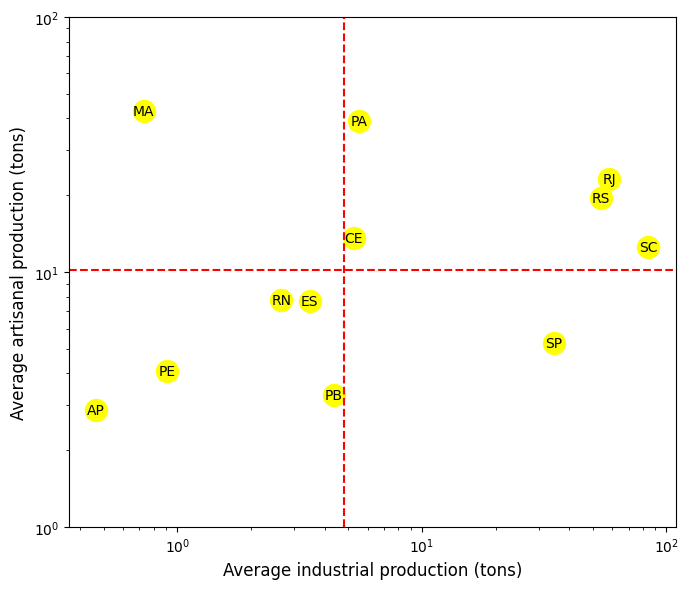

In [ ]:
#@title Fig.2 - Mean
""" Plot for the dissertation-article """

plt.figure(figsize=(7,6))

ax = plt.gca()  # Get the current axes
ax.set_xscale('log')
ax.set_yscale('log')

# Plot the scatter plot
scatter = ax.scatter(df_medidas['med_ind'], df_medidas['med_art'], s=250, alpha=0.99, color='yellow')

# Annotate each point with the state name (index)
for index, row in df_medidas.iterrows():
    x = row['med_ind']
    y = row['med_art']
    ax.annotate(index, (x, y), ha='center', va='center', fontsize=10)  # Increased fontsize

plt.xlabel("Average industrial production (tons)", fontsize=12)  # Average industrial production (tons)
plt.ylabel("Average artisanal production (tons)", fontsize=12)  # Average artisanal production (tons)

# Add vertical and horizontal lines for the medians (in log scale)
plt.axvline(x=df_medidas['med_ind'].median(), color='red', linestyle='--')
plt.axhline(y=df_medidas['med_art'].median(), color='red', linestyle='--')

# Set the axis limits to start at a specific value, for better log scale visualization
#plt.xlim(left=10**2)  # Adjust 0.3 to your preferred minimum value
plt.ylim(bottom=10**0)
plt.ylim(top=10**2)
plt.tight_layout()  # plt.grid(True, which="both", ls="-", color='0.7')  # Light gray grid


# Fig.3 - DAI vs Corr

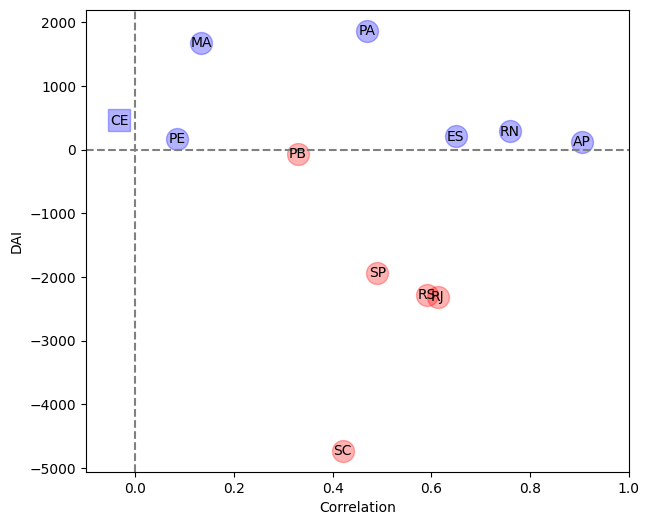

In [ ]:
#@title Fig.3 - DAI vs Corr
""" Plot for the dissertation-article """
plt.figure(figsize=(7,6))

# Iterating through the rows of the DataFrame
for i in range(len(df_medidas)):
    # Set the color based on the 'dai' value
    color = 'blue' if df_medidas['dai'].iloc[i] > 0 else 'red'
    # Set the marker based on the 'pearson' value
    marker = 'o' if df_medidas['pearson'].iloc[i] > 0 else 's'
    # Plot the point in the scatter plot
    plt.scatter(df_medidas['pearson'].iloc[i], df_medidas['dai'].iloc[i],
                s=250, c=color, marker=marker, alpha=0.3)

# Adding axis labels
plt.xlabel('Correlation')  # 'Pearson Correlation'
plt.ylabel('DAI')  # 'DAI (tons)'

# Set the x-axis limits
plt.xlim(-0.1, 1.0)

# Add dashed lines at the axes
plt.axvline(x=0, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')

# Annotate each point with the state name (assuming the DataFrame index is the state name)
for i, estado in enumerate(df_medidas.index):
    x = df_medidas['pearson'].iloc[i]
    y = df_medidas['dai'].iloc[i]
    plt.annotate(estado, (x, y), ha='center', va='center')


# Fig.4 - Persistence

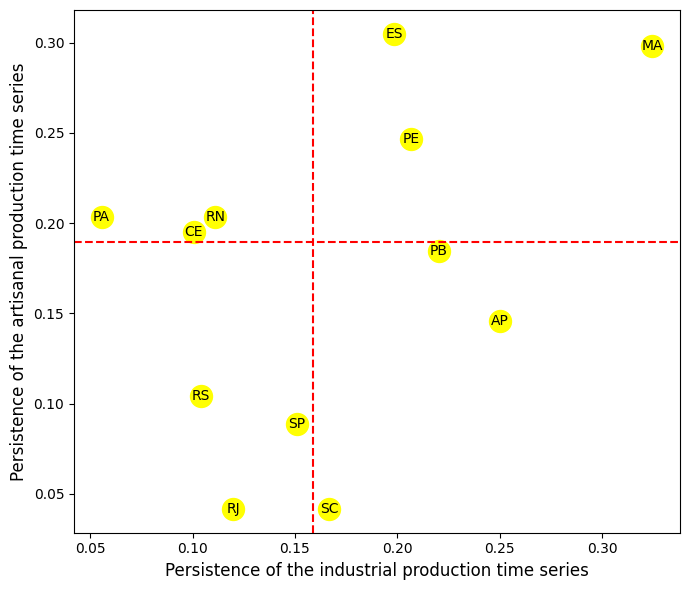

In [ ]:
#@title Fig.4 - Persistence
""" Plot for the dissertation-article """
plt.figure(figsize=(7,6))

scatter = plt.scatter(df_medidas['pers_ind'], df_medidas['pers_art'], s=250, alpha=0.99, color='yellow')

# Annotate each point with the state name (index)
for index, row in df_medidas.iterrows():
    x = row['pers_ind']
    y = row['pers_art']
    plt.annotate(index, (x, y), ha='center', va='center', fontsize=10)

plt.xlabel("Persistence of the industrial production time series", fontsize=12)
plt.ylabel("Persistence of the artisanal production time series", fontsize=12)

# Add median reference lines
plt.axvline(x=df_medidas['pers_ind'].median(), color='red', linestyle='--')
plt.axhline(y=df_medidas['pers_art'].median(), color='red', linestyle='--')

plt.tight_layout()


# Fig.5 - Entropy

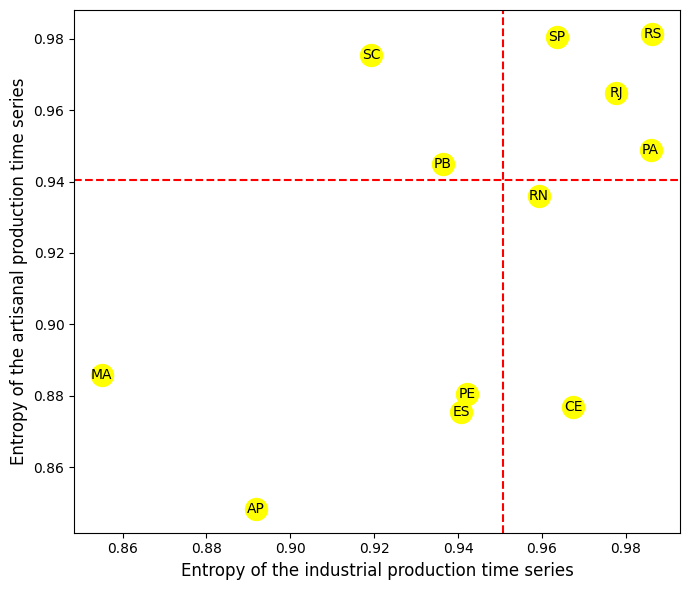

In [ ]:
#@title Fig.5 - Entropy
""" Plot for the dissertation """
plt.figure(figsize=(7,6))

scatter = plt.scatter(df_medidas['entrop_ind'], df_medidas['entrop_art'], s=250, alpha=0.99, color='yellow')

# Annotate each point with the state name (index)
for index, row in df_medidas.iterrows():
    x = row['entrop_ind']
    y = row['entrop_art']
    plt.annotate(index, (x, y), ha='center', va='center', fontsize=10)  # Increased fontsize

plt.xlabel("Entropy of the industrial production time series", fontsize=12)  # Increased fontsize for labels
plt.ylabel("Entropy of the artisanal production time series", fontsize=12)  # Increased fontsize for labels

# Add vertical and horizontal lines for the medians
plt.axvline(x=df_medidas['entrop_ind'].median(), color='red', linestyle='--')
plt.axhline(y=df_medidas['entrop_art'].median(), color='red', linestyle='--')

# Set the axis limits
# plt.xlim(left=0.9)  # Adjust the minimum value as needed
# plt.ylim(bottom=0.9)  # Adjust the minimum value as needed
# plt.ylim(top=1.0)  # Adjust the maximum value as needed

plt.tight_layout()


# Fig.6 - Complexity

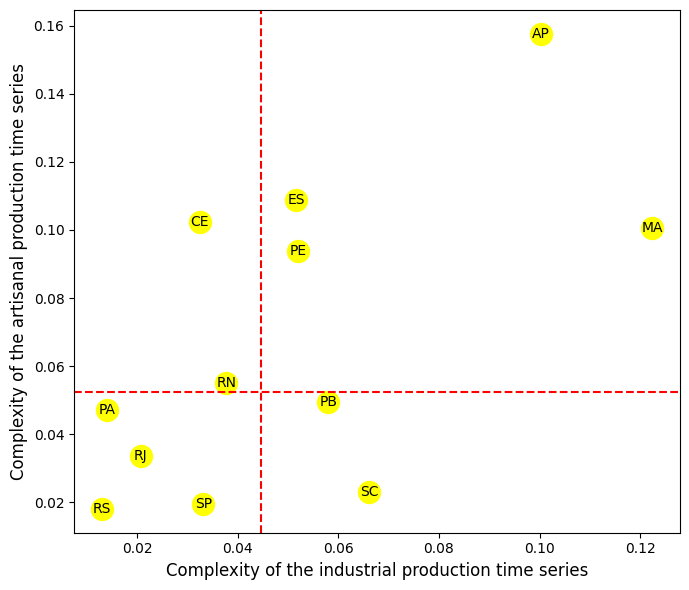

In [ ]:
#@title Fig.6 - Complexity
""" Plot for the dissertation-article """
plt.figure(figsize=(7,6))

scatter = plt.scatter(df_medidas['complex_ind'], df_medidas['complex_art'], s=250, alpha=0.99, color='yellow')

# Annotate each point with the state name (index)
for index, row in df_medidas.iterrows():
    x = row['complex_ind']
    y = row['complex_art']
    plt.annotate(index, (x, y), ha='center', va='center', fontsize=10)  # Increased fontsize

plt.xlabel("Complexity of the industrial production time series", fontsize=12)  # Increased fontsize for labels
plt.ylabel("Complexity of the artisanal production time series", fontsize=12)  # Increased fontsize for labels

# Add vertical and horizontal lines for the medians
plt.axvline(x=df_medidas['complex_ind'].median(), color='red', linestyle='--')
plt.axhline(y=df_medidas['complex_art'].median(), color='red', linestyle='--')
plt.tight_layout()


# Fig.7 - Complexity-Entropy Plane and Euclidean Distance

In [ ]:
# Create a new DataFrame with the desired columns
df_complexidade_entropia = df_medidas[['entrop_art', 'entrop_ind', 'complex_art', 'complex_ind']].copy()

# Reset the index to make the state abbreviations a regular column
df_complexidade_entropia = df_complexidade_entropia.reset_index()

# Rename the index column to 'Estado'
df_complexidade_entropia.rename(columns={'index': 'Estado'}, inplace=True)

# Display the new DataFrame
display(df_complexidade_entropia)

,Estado,entrop_art,entrop_ind,complex_art,complex_ind
0,SC,0.975616,0.919206,0.022946,0.066173
1,RJ,0.964777,0.977680,0.033613,0.020770
2,SP,0.980521,0.963500,0.019399,0.033197
3,RS,0.981436,0.986315,0.018083,0.012997
4,PB,0.945021,0.936400,0.049581,0.058049
5,RN,0.935992,0.959222,0.055055,0.037774
6,PA,0.948758,0.985867,0.047184,0.013978
7,CE,0.876981,0.967494,0.102308,0.032471
8,PE,0.880513,0.942053,0.093711,0.051971
9,AP,0.848273,0.891795,0.157611,0.100319


In [ ]:
from scipy.spatial.distance import euclidean

# Calculate the Euclidean distance between artisanal and industrial points for each state
df_complexidade_entropia['euclidean_distance'] = df_complexidade_entropia.apply(
    lambda row: euclidean(
        (row['entrop_art'], row['complex_art']),
        (row['entrop_ind'], row['complex_ind'])
    ),
    axis=1
)

# Display the DataFrame with the new column
display(df_complexidade_entropia)

,Estado,entrop_art,entrop_ind,complex_art,complex_ind,euclidean_distance
0,SC,0.975616,0.919206,0.022946,0.066173,0.071067
1,RJ,0.964777,0.977680,0.033613,0.020770,0.018205
2,SP,0.980521,0.963500,0.019399,0.033197,0.021911
3,RS,0.981436,0.986315,0.018083,0.012997,0.007048
4,PB,0.945021,0.936400,0.049581,0.058049,0.012084
5,RN,0.935992,0.959222,0.055055,0.037774,0.028953
6,PA,0.948758,0.985867,0.047184,0.013978,0.049797
7,CE,0.876981,0.967494,0.102308,0.032471,0.114324
8,PE,0.880513,0.942053,0.093711,0.051971,0.074360
9,AP,0.848273,0.891795,0.157611,0.100319,0.071948


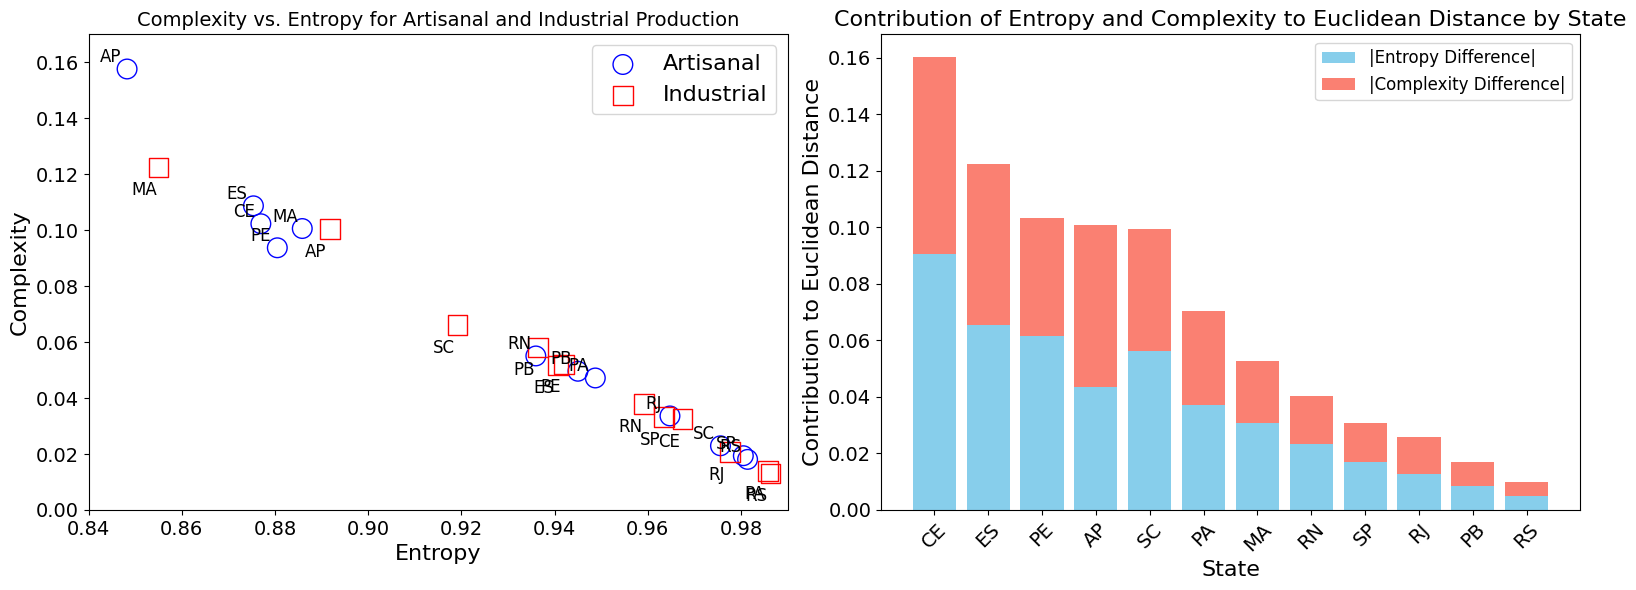

In [ ]:
#@title Fig.7 - Complexity-Entropy Plane and Euclidean Distance
""" Gráfico para a dissertação-artigo """;
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Complexity vs. Entropy for Artisanal and Industrial Production
ax1 = axes[0]
ax1.scatter(df_complexidade_entropia['entrop_art'], df_complexidade_entropia['complex_art'], s=200, alpha=0.99, label='Artisanal', color='blue', facecolors='none', edgecolors='blue', marker='o')
ax1.scatter(df_complexidade_entropia['entrop_ind'], df_complexidade_entropia['complex_ind'], s=200, alpha=0.99, label='Industrial', color='red', facecolors='none', edgecolors='red', marker='s')

# Annotate each point with the state name
for index, row in df_complexidade_entropia.iterrows():
    ax1.annotate(row['Estado'], (row['entrop_art'], row['complex_art']), textcoords="offset points", xytext=(-12,5), ha='center', fontsize=12) # Adjusted annotation position
    ax1.annotate(row['Estado'], (row['entrop_ind'], row['complex_ind']), textcoords="offset points", xytext=(-10,-20), ha='center', fontsize=12) # Adjusted annotation position

ax1.set_xlabel("Entropy", fontsize=16)
ax1.set_ylabel("Complexity", fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xlim(left=0.84,right=0.99)
ax1.set_ylim(bottom=0.0,top=0.17)
ax1.set_title("Complexity vs. Entropy for Artisanal and Industrial Production", fontsize=14)
ax1.legend(fontsize=16)
ax1.grid(False)


# Euclidean Distance with Entropy and Complexity Contributions
ax2 = axes[1]

# Sort the DataFrame by Euclidean distance
df_complexidade_entropia_sorted = df_complexidade_entropia.sort_values(by='euclidean_distance', ascending=False).copy()

# Calculate the absolute difference in entropy and complexity
df_complexidade_entropia_sorted['abs_entropy_diff'] = abs(df_complexidade_entropia_sorted['entrop_art'] - df_complexidade_entropia_sorted['entrop_ind'])
df_complexidade_entropia_sorted['abs_complexity_diff'] = abs(df_complexidade_entropia_sorted['complex_art'] - df_complexidade_entropia_sorted['complex_ind'])

# Plot the stacked bar plot
ax2.bar(df_complexidade_entropia_sorted['Estado'], df_complexidade_entropia_sorted['abs_entropy_diff'], color='skyblue', label='|Entropy Difference|')
ax2.bar(df_complexidade_entropia_sorted['Estado'], df_complexidade_entropia_sorted['abs_complexity_diff'], bottom=df_complexidade_entropia_sorted['abs_entropy_diff'], color='salmon', label='|Complexity Difference|')

ax2.set_xlabel("State", fontsize=16)
ax2.set_ylabel("Contribution to Euclidean Distance", fontsize=16)
ax2.set_title("Contribution of Entropy and Complexity to Euclidean Distance by State", fontsize=16)
ax2.tick_params(axis='x', rotation=45, labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()